In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import SEACells
import sys
sys.path.insert(1, '/home/marta.sallese/ov_cancer_atlas/atlas_project/utils')
from metacells_derivation import preprocess, assign_metacells, create_mc_matrix, preprocess_mc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [2]:
# Some plotting aesthetics 
%matplotlib inline
sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rcParams['savefig.directory'] = '/group/testa/Project/OvarianAtlas/atlas_project/plots_def/metacells/'

In [3]:
initDir = '/group/testa/Project/OvarianAtlas/atlas_project/raw_data/metacells_backup/metacells/fibroblasts/'
genes = '/home/marta.sallese/ov_cancer_atlas/atlas_project/script/4_hdg/Tables/atlas_hdg_dispersion_patients_fibroblasts.csv'

In [4]:
adata = sc.read(initDir + 'seacells_assignment_hdg_patients.h5ad')

In [5]:
ad = create_mc_matrix(adata)

100%|██████████| 6639/6639 [02:17<00:00, 48.18it/s]


In [6]:
adata.obs

,ID,sample_name,tissue,developmental_stage,treatment,recurrence,tumor_stage,paper_ID,anatomical_location,patient_id,...,CancerMSK,EndothelialMSK,FibroblastsMSK,HematopoieticMSK,cell_labels_ratio,max,assignment,leiden-1.8,SEACell,SEACell_patient_tissue
AAACCTGAGAGACGAA-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,-0.106276,0.598902,1.259536,-1.528241,2.103074,FibroblastsMSK,CancerMSK,18,SEACell-137,SEACell-137_Geistlinger_59_Metastasis
AAACCTGAGTCATCCA-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,0.022695,0.295592,0.405196,-0.798307,1.273053,FibroblastsMSK,CancerMSK,3,SEACell-76,SEACell-76_Geistlinger_59_Metastasis
AAACCTGAGTGCGATG-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,-0.270711,-0.034378,0.733112,0.627006,1.169225,FibroblastsMSK,CancerMSK,17,SEACell-108,SEACell-108_Geistlinger_59_Metastasis
AAACCTGCAACACGCC-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,-0.327823,0.798920,1.015176,-1.069161,1.270686,FibroblastsMSK,CancerMSK,18,SEACell-135,SEACell-135_Geistlinger_59_Metastasis
AAACCTGCAACGATGG-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,0.080380,0.243281,1.781402,-1.289696,5.503903,FibroblastsMSK,CancerMSK,12,SEACell-101,SEACell-101_Geistlinger_59_Metastasis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGGTTGTCACCTTC,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,-0.197573,0.044057,0.492569,-1.379126,11.180170,FibroblastsMSK,HematopoieticMSK,32,SEACell-44,SEACell-44_Vasquez_118_Metastasis
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGTTGCAAGAGTTA,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,-0.379123,0.203085,2.004465,-1.362430,9.870087,FibroblastsMSK,HematopoieticMSK,5,SEACell-32,SEACell-32_Vasquez_118_Metastasis
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGTTGCAGCGTACC,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,-0.268423,0.020071,2.131091,-1.186549,106.177316,FibroblastsMSK,HematopoieticMSK,5,SEACell-32,SEACell-32_Vasquez_118_Metastasis
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGTTGTCCCTTCCC,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,0.278343,0.115887,1.311216,-1.477107,3.326014,FibroblastsMSK,HematopoieticMSK,32,SEACell-39,SEACell-39_Vasquez_118_Metastasis


In [7]:
adata.obs['SEACell'] = adata.obs['SEACell_patient_tissue']

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


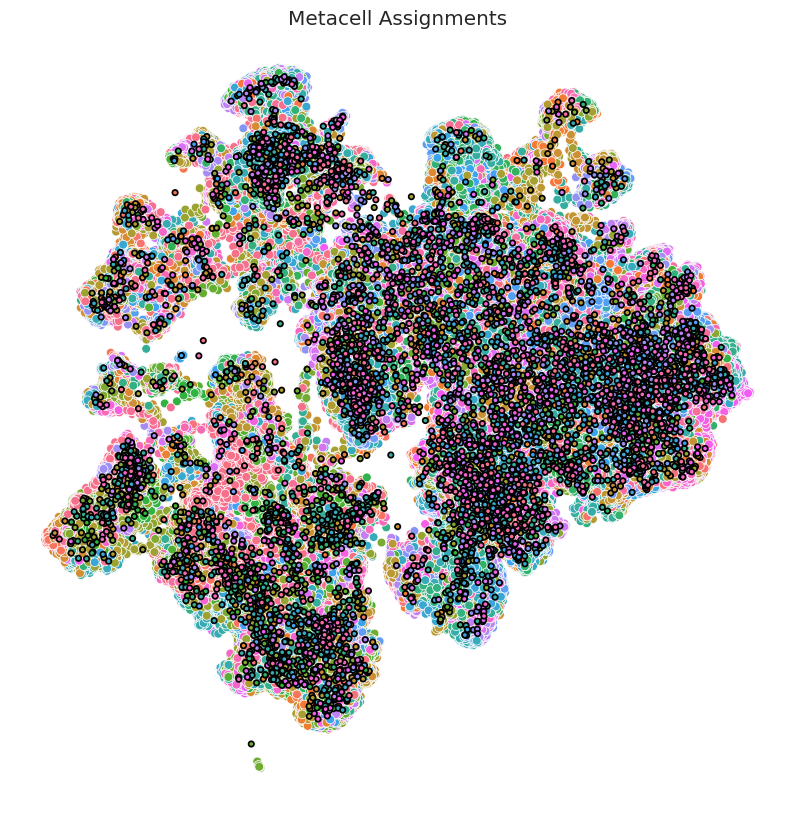

In [8]:
SEACells.plot.plot_2D(adata, key='X_umap', colour_metacells=True, SEACell_size=15, cell_size=40, figsize=(10, 10))

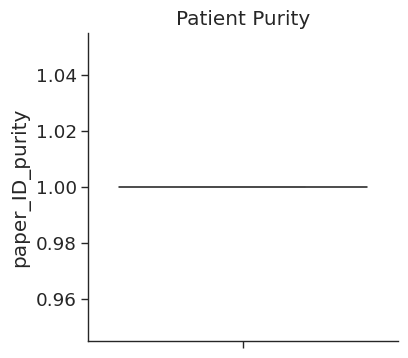

,paper_ID,paper_ID_purity
SEACell,,
SEACell-0_Geistlinger_59_Metastasis,Geistlinger_59,1.0
SEACell-0_Geistlinger_76_Metastasis,Geistlinger_76,1.0
SEACell-0_Geistlinger_90_Metastasis,Geistlinger_90,1.0
SEACell-0_Loret_1_Metastasis,Loret_1,1.0
SEACell-0_Loret_2_Primary,Loret_2,1.0


In [9]:
SEACell_purity = SEACells.evaluate.compute_celltype_purity(adata, 'paper_ID')

plt.figure(figsize=(4,4))
sns.boxplot(data=SEACell_purity, y='paper_ID_purity')
plt.title('Patient Purity')
sns.despine()
plt.show()
plt.close()

SEACell_purity.head()

Determing nearest neighbor graph...


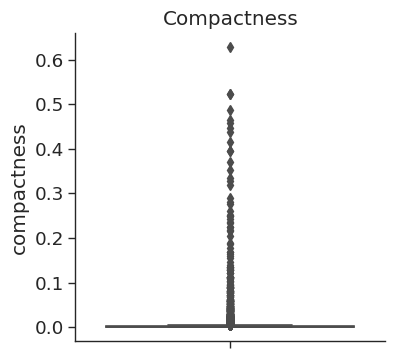

,compactness
SEACell,
SEACell-0_Geistlinger_59_Metastasis,0.000741
SEACell-0_Geistlinger_76_Metastasis,0.002309
SEACell-0_Geistlinger_90_Metastasis,0.318057
SEACell-0_Loret_1_Metastasis,0.000114
SEACell-0_Loret_2_Primary,0.000369


In [10]:
compactness = SEACells.evaluate.compactness(adata, 'X_pca')

plt.figure(figsize=(4,4))
sns.boxplot(data=compactness, y='compactness')
plt.title('Compactness')
sns.despine()
plt.show()
plt.close()

compactness.head()

Determing nearest neighbor graph...


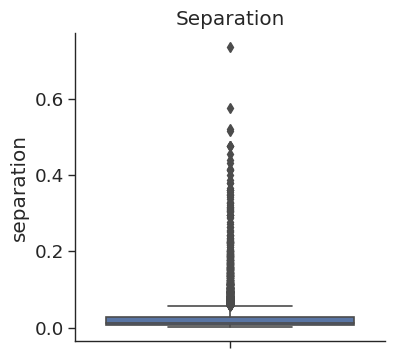

,separation
SEACell,
SEACell-0_Geistlinger_59_Metastasis,0.024710
SEACell-0_Geistlinger_76_Metastasis,0.034648
SEACell-0_Geistlinger_90_Metastasis,0.295535
SEACell-0_Loret_1_Metastasis,0.013765
SEACell-0_Loret_2_Primary,0.004046


In [11]:
separation = SEACells.evaluate.separation(adata, 'X_pca',nth_nbr=1)

plt.figure(figsize=(4,4))
sns.boxplot(data=separation, y='separation')
plt.title('Separation')
sns.despine()
plt.show()
plt.close()

separation.head()